# Esther McCabe
### GENBA 894

## Factors that influence the sale price of lots of beef calves and feeder cattle sold via summer video auction from 1995 through 2018

In [809]:
# import python packages
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from pandas.tools import plotting
import matplotlib.pyplot as plt
%matplotlib inline

## Lots of Beef Calves

In [810]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.beefmagazine.com/sites/beefmagazine.com/files/styles/article_featured_standard/public/baby-beef-calves-weaned20070718dab48.jpg?itok=-978nEuZ")

## Data Description

#### This observational dataset has been collected since 1995 through 2018 from one video auction company. Over the last 24 years, the same person has input all data into the database. The database is currently maintained in Access and updated throughout the year. There are 241,278 lots of cattle in the database, each with numerous variables collected such as sale date, weight, breed, etc. All the lot information is provided electronically by the video auction company. These 241,278 lots represent 26,435,097 head of cattle. 

#### For this project, only sold lots of beef calves and feeder cattle lots from the summer sales are included.

### We will start with lots of beef calves. 

#### Variables:
- SYEAR: Sale Year 1995 - 2018
- LOTID: Count of number of lots of beef calves
- SMONTH: Sale Month 1=January, 12=December
- SUMMER: Sold in a summer sale, all 1=Yes
- HEAD: Number of calves in a lot
- SEX: Gender of lot, 1=Steer, 2=Heifer
- ATYPE: Animal Type, 0=Unweaned, 1=Weaned
- WT: Average weight of the lot (total lot weight/# of head in lot)
- PRICE: Sale Price of lot ($/cwt)
- STATE: STate of origin of lot
- STATECODE: Code of state, alphabetical order starting with 1
- SAREA: Sale area, the states are divided into five areas or regions, 1=West Coast, 2=Rocky Mountain/North Central, 3=South Central, 4=Northeast, 5=Southeast
- BREED: General breed of the lot, 1=English, English crossed, 3=English-Contenintal crossed, 4=Brahman-influenced
- FRAME: Frame score of calves in lot, 3=Small, 4=Medium, 5=Large
- FLESH: Amount of flesh (body condition) of calves in lot, 2=Light, 3=Light/Medium, 4=Medium, 5=Heavy
- VAC: Vaccinations of lot, 0=vaccinated but not qualified for program, 1=vaccinated and qualify for program


In [811]:
# import dataset
SLA=pd.read_csv("DATA/DATAR.csv")
SLA.head()

,SYEAR,LOTID,SMONTH,SUMMER,HEAD,SEX,ATYPE,WT,PRICE,STATE,STATECODE,SAREA,BREED,FRAME,FLESH,VAC
0,1995,1,6,1,115,1,1,425,81.25,OK,25,3,3,4,4,1
1,1995,2,6,1,220,1,1,460,80.00,OK,25,3,3,4,4,1
2,1995,3,6,1,84,1,1,570,77.00,MO,23,3,1,4,4,1
3,1995,4,6,1,83,1,1,610,74.50,KS,22,3,3,5,4,0
4,1995,5,6,1,155,1,1,625,68.10,MS,46,5,4,3,4,0


## Data Tranformation

In [812]:
#data types & missing values
SLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94872 entries, 0 to 94871
Data columns (total 16 columns):
SYEAR        94872 non-null int64
LOTID        94872 non-null int64
SMONTH       94872 non-null int64
SUMMER       94872 non-null int64
HEAD         94872 non-null int64
SEX          94872 non-null int64
ATYPE        94872 non-null int64
WT           94872 non-null int64
PRICE        94872 non-null float64
STATE        94872 non-null object
STATECODE    94872 non-null int64
SAREA        94872 non-null int64
BREED        94872 non-null int64
FRAME        94872 non-null int64
FLESH        94872 non-null int64
VAC          94872 non-null int64
dtypes: float64(1), int64(14), object(1)
memory usage: 11.6+ MB


##### There are no missing data in this dataset.

In [813]:
# remove unnecessary columnS
SLA = SLA.drop(['SUMMER','ATYPE'], axis=1)
SLA.head()

,SYEAR,LOTID,SMONTH,HEAD,SEX,WT,PRICE,STATE,STATECODE,SAREA,BREED,FRAME,FLESH,VAC
0,1995,1,6,115,1,425,81.25,OK,25,3,3,4,4,1
1,1995,2,6,220,1,460,80.00,OK,25,3,3,4,4,1
2,1995,3,6,84,1,570,77.00,MO,23,3,1,4,4,1
3,1995,4,6,83,1,610,74.50,KS,22,3,3,5,4,0
4,1995,5,6,155,1,625,68.10,MS,46,5,4,3,4,0


In [814]:
# value count but using describe 
SLA.groupby('STATE').size()

STATE
AL      143
AR      319
AZ      863
CA      248
CO    10771
FL     3491
GA      244
IA      460
ID     6710
IL      222
IN       29
KS     3326
KY       25
LA     1689
ME        1
MI      157
MN      166
MO      948
MS      167
MT    13267
NC      385
ND     2032
NE     4940
NM     3726
NV     3924
OH       20
OK     2346
OR     5679
SC       12
SD     3565
TN       49
TX    10116
UT     5994
VA       41
WA      511
WI       82
WY     8204
dtype: int64

#### While SAREA not STATE will be included in the model, it is interesting to investiagte which states are represented in the dataset. The states of Colorado, Montana, and Texas are the three largest states represented.

In [815]:
# value count but using describe 
SLA.groupby('VAC').size()

VAC
0    25661
1    69211
dtype: int64

#### There were 25,661 lots not qualifed for a vaccination program and 69,211 lots qualified for a vaccination program

In [816]:
# value count but using describe 
SLA.groupby('BREED').size()

BREED
1    39396
3    37558
4    17918
dtype: int64

#### The breed distributions included 39,396 lots of English, English crossed, 37,558 lots of English-Continental crossed, and 17,918 lots of Brahman-influenced.

In [817]:
# value count but using describe 
SLA.groupby('SMONTH').size()

SMONTH
4       568
5      1653
6     12535
7     33883
8     32043
9     12591
10     1239
11      360
dtype: int64

#### The "summer" sale months are from April through November, with the largest months being July and August.

In [818]:
# value count but using describe 
SLA.groupby('SEX').size()

SEX
1    57647
2    37225
dtype: int64

#### There were 57,647 lots of steer calves and 37,225 lots of heifer calves.

In [819]:
# value count but using describe 
SLA.groupby('SYEAR').size()

SYEAR
1995    1823
1996    2161
1997    2205
1998    2108
1999    2985
2000    3342
2001    3119
2002    3170
2003    3904
2004    4231
2005    4313
2006    3869
2007    4605
2008    4164
2009    4199
2010    5832
2011    5512
2012    4400
2013    5292
2014    4503
2015    4572
2016    4695
2017    5122
2018    4746
dtype: int64

#### The years in the dataset are 1995 through 2018. There are year to year variations in the number of lots sold.

### Combining Groups

#### Frame

In [820]:
SLA.groupby('FRAME').size()

FRAME
1       14
2      191
3    40262
4    41811
5    11102
6     1349
7      143
dtype: int64

In [821]:
SLA = SLA.replace({'FRAME': 1}, {'FRAME': 3})

In [822]:
SLA = SLA.replace({'FRAME': 2}, {'FRAME': 3})

In [823]:
SLA = SLA.replace({'FRAME': 7}, {'FRAME': 5})

In [824]:
SLA = SLA.replace({'FRAME': 6}, {'FRAME': 5})

In [825]:
SLA.groupby('FRAME').size()

FRAME
3    40467
4    41811
5    12594
dtype: int64

#### Frame scores 1 and 2 were small and combined with group 3. Frame score 6 and 7 were small and combined with 5. This resulted in three groups of frame scores, 3=small, 4=medium, 5=large.

#### Flesh

In [826]:
SLA.groupby('FLESH').size()

FLESH
1      107
2     4104
3     6466
4    80780
5     2460
6      942
7       13
dtype: int64

In [827]:
SLA = SLA.replace({'FLESH': 1}, {'FLESH': 2})

In [828]:
SLA = SLA.replace({'FLESH': 7}, {'FLESH': 5})

In [829]:
SLA = SLA.replace({'FLESH': 6}, {'FLESH': 5})

In [830]:
SLA.groupby('FLESH').size()

FLESH
2     4211
3     6466
4    80780
5     3415
dtype: int64

#### Flesh score 1 was a small group and combined with score 2. Scores 6 and 7 were small groups as well and combined with group 5. The final flesh score groups are 2=light, 3=light/medium, 4=medium, and 5=heavy.

#### SAREA

In [831]:
SLA.groupby('SAREA').size()

SAREA
1    23066
2    43895
3    21325
4       21
5     6565
dtype: int64

In [832]:
SLA = SLA.replace({'SAREA': 4}, {'SAREA': 5})

In [833]:
SLA.groupby('SAREA').size()

SAREA
1    23066
2    43895
3    21325
5     6586
dtype: int64

#### SAREA 4 was small, thus combined with SAREA 5.

## Exploratory Data Analysis and Data Visualization

In [834]:
#Describe shows a quick statistic summary of your data
#this is a good way to examine the numerical columns
SLA.describe()

,SYEAR,LOTID,SMONTH,HEAD,SEX,WT,PRICE,STATECODE,SAREA,BREED,FRAME,FLESH,VAC
count,94872.000000,94872.000000,94872.000000,94872.000000,94872.000000,94872.000000,94872.000000,94872.000000,94872.000000,94872.000000,94872.000000,94872.000000,94872.00000
mean,2008.162883,115776.113606,7.472605,111.481154,1.392371,560.953021,134.750527,15.956742,2.189909,2.358357,3.706204,3.879069,0.72952
std,6.409211,66999.030234,1.038856,71.953652,0.488281,79.046282,48.860322,10.544034,1.027924,1.199246,0.687735,0.516792,0.44421
min,1995.000000,1.000000,4.000000,5.000000,1.000000,235.000000,41.250000,0.000000,1.000000,1.000000,3.000000,2.000000,0.00000
25%,2003.000000,63342.750000,7.000000,79.000000,1.000000,500.000000,103.000000,7.000000,2.000000,1.000000,3.000000,4.000000,0.00000
50%,2009.000000,104860.500000,7.000000,90.000000,1.000000,550.000000,124.000000,15.000000,2.000000,3.000000,4.000000,4.000000,1.00000
75%,2013.000000,172941.250000,8.000000,110.000000,2.000000,610.000000,155.000000,22.000000,3.000000,3.000000,4.000000,4.000000,1.00000
max,2018.000000,239006.000000,11.000000,1380.000000,2.000000,960.000000,422.000000,50.000000,5.000000,4.000000,5.000000,5.000000,1.00000


#### Of all variables, the only continuous variables are price and weight. Those two variables are the focus. 
#### The average weight of these lots were 560.95 pounds, ranging from 235.0 pounds to 960.0 pounds. 
#### The average price was $134.75/cwt, ranging from 41.25/cwt to 422.00/cwt.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000643BB358>,
      dtype=object)

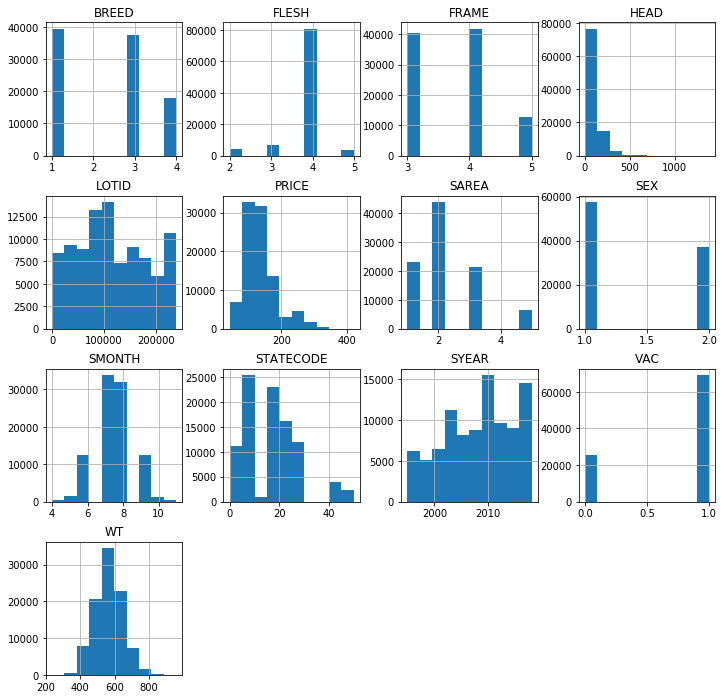

In [835]:
SLA.hist(figsize=(12,12))

In [836]:
SLA.corr()

,SYEAR,LOTID,SMONTH,HEAD,SEX,WT,PRICE,STATECODE,SAREA,BREED,FRAME,FLESH,VAC
SYEAR,1.000000,0.971616,-0.088036,-0.112701,-0.003453,0.125283,0.732215,-0.167889,-0.041601,-0.185266,-0.001793,-0.036868,0.432266
LOTID,0.971616,1.000000,-0.047674,-0.107917,-0.002026,0.116331,0.723935,-0.184238,-0.040155,-0.166417,0.007888,-0.038818,0.368652
SMONTH,-0.088036,-0.047674,1.000000,-0.016740,-0.001158,-0.085901,-0.083700,0.006256,-0.000927,0.042095,0.032692,-0.014937,-0.103688
HEAD,-0.112701,-0.107917,-0.016740,1.000000,-0.083927,-0.133153,-0.029359,-0.006816,-0.040767,-0.046834,-0.008735,-0.096600,-0.037788
SEX,-0.003453,-0.002026,-0.001158,-0.083927,1.000000,-0.233292,-0.089740,0.010311,0.015743,0.044483,-0.012067,-0.015052,-0.012702
WT,0.125283,0.116331,-0.085901,-0.133153,-0.233292,1.000000,-0.053411,-0.037952,-0.024189,-0.040775,0.216679,0.226646,0.091223
PRICE,0.732215,0.723935,-0.083700,-0.029359,-0.089740,-0.053411,1.000000,-0.123237,-0.075940,-0.177306,-0.017083,-0.073875,0.306816
STATECODE,-0.167889,-0.184238,0.006256,-0.006816,0.010311,-0.037952,-0.123237,1.000000,0.880773,0.362120,-0.138771,0.012126,-0.133954
SAREA,-0.041601,-0.040155,-0.000927,-0.040767,0.015743,-0.024189,-0.075940,0.880773,1.000000,0.407920,-0.161950,0.010374,-0.106852
BREED,-0.185266,-0.166417,0.042095,-0.046834,0.044483,-0.040775,-0.177306,0.362120,0.407920,1.000000,0.029630,-0.023344,-0.184929


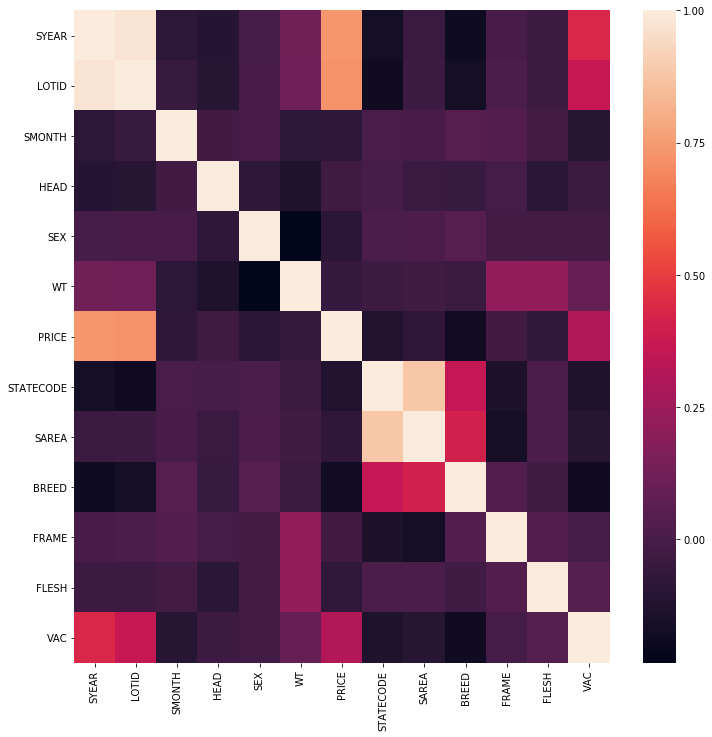

In [845]:
# heat map of correlation
plt.figure(figsize=(12,12))
sns.heatmap(SLA.corr())

Because of the large number of categorical variables in this dataset, correctly interpreting a correlation has limitations. 

In [876]:
#Exporting Data to CSV to use in Tableau for Data Visulaization
#Tableau charts shared in a PowerPoint File 
SLA.to_csv("data/SLA.csv")

# Lots of Feeder Cattle

Lots of feeder cattle are included in the dataset as well, however, feeder cattle lots are not as frequent and do not appear every year (present 1996 - 2018).  

#### Variables:
- SYEAR: Sale Year 1995 - 2018
- LOTID: Count of number of lots of beef calves
- SMONTH: Sale Month 1=January, 12=December
- SUMMER: Sold in a summer sale, all 1=Yes (Will remove, all are summer)
- HEAD: Number of calves in a lot
- SEX: Gender of lot, 1=Steer, 2=Heifer
- ATYPE: Animal Type, 2 = Feeder (Will removed column, all are feeders)
- WT: Average weight of the lot (total lot weight/# of head in lot)
- PRICE: Sale Price of lot ($/cwt)
- STATE: STate of origin of lot
- STATECODE: Code of state, alphabetical order starting with 1
- SAREA: Sale area, the states are divided into five areas or regions, 1=West Coast, 2=Rocky Mountain/North Central, 3=South Central, 4=Northeast, 5=Southeast
- BREED: General breed of the lot, 1=English, English crossed, 3=English-Contenintal crossed, 4=Brahman-influenced
- FRAME: Frame score of calves in lot, 3=Small, 4=Medium, 5=Large
- FLESH: Amount of flesh (body condition) of calves in lot, 2=Light, 3=Light/Medium, 4=Medium, 5=Heavy
- VAC: Vaccinations of lot, 0=vaccinated but not qualified for program, 1=vaccinated and qualify for program

In [848]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://www.amscattle.com/wp-content/uploads/2013/02/DSCN7633.jpg")

In [849]:
# import dataset
FEEDER=pd.read_csv("DATA/FEEDER.csv")
FEEDER.head()

,SYEAR,LOTID,SUMMER,SMONTH,HEAD,SEX,ATYPE,WT,PRICE,STATE,STATECODE,SAREA,BREED,FRAME,FLESH,VAC
0,2010,111922,1,6,39,1,2,640,105.25,TX,26,3,4,4,4,0
1,2010,111923,1,6,39,2,2,640,98.25,TX,26,3,4,4,4,0
2,2010,111924,1,6,35,1,2,700,105.50,LA,45,5,4,3,2,0
3,2010,111925,1,6,35,2,2,700,99.50,LA,45,5,4,3,2,0
4,2010,111926,1,6,32,1,2,735,105.25,TX,26,3,4,4,4,1


## Data Transformation

In [850]:
#data types & missing values
FEEDER.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23862 entries, 0 to 23861
Data columns (total 16 columns):
SYEAR        23862 non-null int64
LOTID        23862 non-null int64
SUMMER       23862 non-null int64
SMONTH       23862 non-null int64
HEAD         23862 non-null int64
SEX          23862 non-null int64
ATYPE        23862 non-null int64
WT           23862 non-null int64
PRICE        23862 non-null float64
STATE        23862 non-null object
STATECODE    23862 non-null int64
SAREA        23862 non-null int64
BREED        23862 non-null int64
FRAME        23862 non-null int64
FLESH        23862 non-null int64
VAC          23862 non-null int64
dtypes: float64(1), int64(14), object(1)
memory usage: 2.9+ MB


#### There are no missing values.

In [851]:
# remove unnecessary columnS
FEEDER = FEEDER.drop(['SUMMER','ATYPE'], axis=1)
FEEDER.head()

,SYEAR,LOTID,SMONTH,HEAD,SEX,WT,PRICE,STATE,STATECODE,SAREA,BREED,FRAME,FLESH,VAC
0,2010,111922,6,39,1,640,105.25,TX,26,3,4,4,4,0
1,2010,111923,6,39,2,640,98.25,TX,26,3,4,4,4,0
2,2010,111924,6,35,1,700,105.50,LA,45,5,4,3,2,0
3,2010,111925,6,35,2,700,99.50,LA,45,5,4,3,2,0
4,2010,111926,6,32,1,735,105.25,TX,26,3,4,4,4,1


In [852]:
# value count but using describe 
FEEDER.groupby('STATE').size()

STATE
AL     176
AR    1401
AZ     231
CA     219
CO    1657
FL      76
GA     245
IA     433
ID     671
IL      91
IN       6
KS    4203
KY      61
LA     294
ME       1
MI      74
MN      37
MO     745
MS     120
MT     740
NC     180
ND     136
NE    1025
NM     509
NV     882
NY       6
OH       7
OK    2232
OR    1053
PA       1
SC      23
SD     251
TN      59
TX    4389
UT     520
VA      26
WA      83
WI      89
WV      22
WY     871
ar       2
ok       5
tx      10
dtype: int64

In [853]:
FEEDER = FEEDER.replace({'STATE': 'ar'}, {'STATE': 'AR'})

In [854]:
FEEDER = FEEDER.replace({'STATE': 'ok'}, {'STATE': 'OK'})

In [855]:
FEEDER = FEEDER.replace({'STATE': 'tx'}, {'STATE': 'TX'})

### Combining Groups

#### VAC

In [856]:
# value count but using describe 
FEEDER.groupby('VAC').size()

VAC
0    19841
1     4021
dtype: int64

#### There were 19,841 lots not qualifed for a vaccination program and 4,021 lots qualifed for a vaccination program.

#### FRAME

In [857]:
# value count but using describe 
FEEDER.groupby('FRAME').size()

FRAME
1       13
2      149
3     7890
4    11727
5     3549
6      479
7       55
dtype: int64

In [858]:
FEEDER = FEEDER.replace({'FRAME': 1}, {'FRAME': 3})

In [859]:
FEEDER = FEEDER.replace({'FRAME': 2}, {'FRAME': 3})

In [860]:
FEEDER = FEEDER.replace({'FRAME': 7}, {'FRAME': 5})

In [861]:
FEEDER = FEEDER.replace({'FRAME': 6}, {'FRAME': 5})

In [862]:
# value count but using describe 
FEEDER.groupby('FRAME').size()

FRAME
3     8052
4    11727
5     4083
dtype: int64

#### Frame scores 1 and two were small and combined with group 3. Frame scores 6 and 7 were small and combined with 5. This leaves group 3=small, 4=medium, and 5=large.

#### FLESH

In [863]:
# value count but using describe 
FEEDER.groupby('FLESH').size()

FLESH
1       26
2     1029
3     1668
4    19979
5      796
6      362
7        2
dtype: int64

In [864]:
FEEDER = FEEDER.replace({'FLESH': 1}, {'FLESH': 2})

In [865]:
FEEDER = FEEDER.replace({'FLESH': 7}, {'FLESH': 5})

In [866]:
FEEDER = FEEDER.replace({'FLESH': 6}, {'FLESH': 5})

In [867]:
# value count but using describe 
FEEDER.groupby('FLESH').size()

FLESH
2     1055
3     1668
4    19979
5     1160
dtype: int64

#### Flesh score 1 was small and combined with group 2. Flesh scores 6 and 7 were small and combined with 5. This leaves the final groups of 2=light, 3=light/medium, 4=medium, and 5=heavy.

#### BREED

In [868]:
# value count but using describe 
FEEDER.groupby('BREED').size()

BREED
1    5263
3    9095
4    9504
dtype: int64

#### The breed composition of lots of feeder cattle were 5,263 lots of English, English crossed, 9,095 lots of English-Continental crossed, and 9,504 lots of Brahman-influenced.

#### SAREA

In [869]:
FEEDER.groupby('SAREA').size()

SAREA
1     3428
2     5410
3    12324
4       37
5     2663
dtype: int64

In [870]:
FEEDER = FEEDER.replace({'SAREA': 4}, {'SAREA': 5})

In [871]:
# value count but using describe 
FEEDER.groupby('SAREA').size()

SAREA
1     3428
2     5410
3    12324
5     2700
dtype: int64

#### SAREA 4 was small and combined with SAREA 5.

## Exploratory Data Analysis

In [872]:
#Describe shows a quick statistic summary of your data
#this is a good way to examine the numerical columns
FEEDER.describe()

,SYEAR,LOTID,SMONTH,HEAD,SEX,WT,PRICE,STATECODE,SAREA,BREED,FRAME,FLESH,VAC
count,23862.000000,23862.000000,23862.000000,23862.000000,23862.000000,23862.000000,23862.000000,23862.000000,23862.000000,23862.000000,23862.000000,23862.000000,23862.000000
mean,2006.862794,102383.966181,7.381779,125.887646,1.387436,783.060096,114.905306,20.295658,2.712262,2.957170,3.833669,3.890286,0.168511
std,6.809251,68804.910226,1.265613,115.485876,0.487175,84.878691,40.284065,11.163846,1.082227,1.130818,0.693472,0.532297,0.374327
min,1996.000000,2935.000000,4.000000,4.000000,1.000000,420.000000,45.000000,0.000000,1.000000,1.000000,3.000000,2.000000,0.000000
25%,2001.000000,41040.500000,7.000000,63.000000,1.000000,725.000000,82.500000,10.000000,2.000000,3.000000,3.000000,4.000000,0.000000
50%,2005.000000,85380.500000,7.000000,74.000000,1.000000,780.000000,108.000000,22.000000,3.000000,3.000000,4.000000,4.000000,0.000000
75%,2013.000000,159297.750000,8.000000,140.000000,2.000000,840.000000,137.825000,26.000000,3.000000,4.000000,4.000000,4.000000,0.000000
max,2018.000000,238997.000000,11.000000,1800.000000,2.000000,1125.000000,267.000000,50.000000,5.000000,4.000000,5.000000,5.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000068AFAE80>,
      dtype=object)

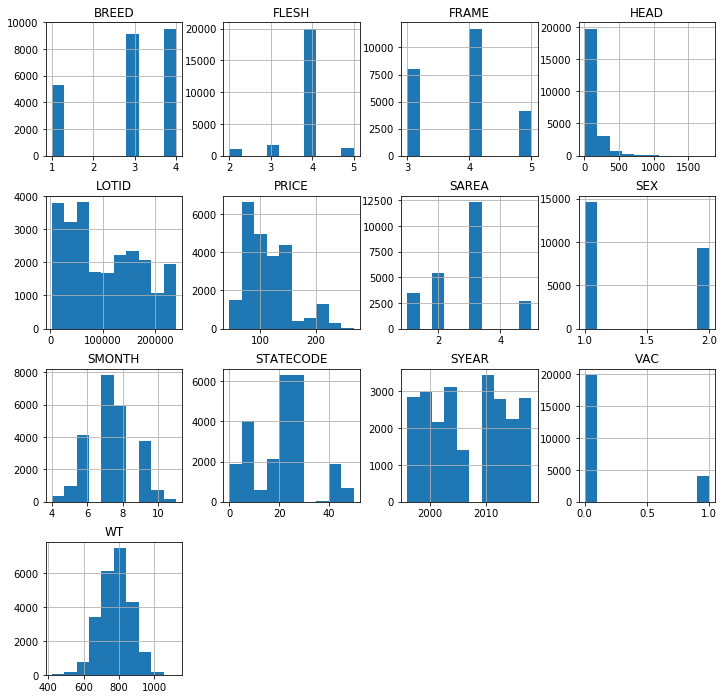

In [873]:
FEEDER.hist(figsize=(12,12))

In [877]:
FEEDER.corr()

,SYEAR,LOTID,SMONTH,HEAD,SEX,WT,PRICE,STATECODE,SAREA,BREED,FRAME,FLESH,VAC
SYEAR,1.000000,0.990944,-0.103676,-0.041727,-0.057300,0.246894,0.835596,-0.168724,-0.039077,-0.225968,0.138352,-0.035072,0.365210
LOTID,0.990944,1.000000,-0.064766,-0.042079,-0.053624,0.241405,0.832601,-0.193013,-0.040503,-0.226524,0.145319,-0.032461,0.366607
SMONTH,-0.103676,-0.064766,1.000000,-0.023245,0.002478,-0.106987,-0.081078,-0.005845,-0.012720,0.013944,-0.029735,-0.007994,-0.009123
HEAD,-0.041727,-0.042079,-0.023245,1.000000,-0.067081,0.083327,-0.025014,-0.087257,-0.105415,0.022269,-0.000113,-0.005740,-0.067963
SEX,-0.057300,-0.053624,0.002478,-0.067081,1.000000,-0.369070,-0.100595,0.060387,0.069802,0.043131,-0.078557,0.001504,-0.012612
WT,0.246894,0.241405,-0.106987,0.083327,-0.369070,1.000000,0.181884,-0.250077,-0.256010,-0.318067,0.179771,0.172594,0.032489
PRICE,0.835596,0.832601,-0.081078,-0.025014,-0.100595,0.181884,1.000000,-0.106882,-0.050853,-0.206481,0.129784,-0.039477,0.302515
STATECODE,-0.168724,-0.193013,-0.005845,-0.087257,0.060387,-0.250077,-0.106882,1.000000,0.876676,0.392879,-0.058890,-0.087592,-0.013126
SAREA,-0.039077,-0.040503,-0.012720,-0.105415,0.069802,-0.256010,-0.050853,0.876676,1.000000,0.406660,-0.021669,-0.082012,0.040139
BREED,-0.225968,-0.226524,0.013944,0.022269,0.043131,-0.318067,-0.206481,0.392879,0.406660,1.000000,0.009941,-0.059608,-0.113540


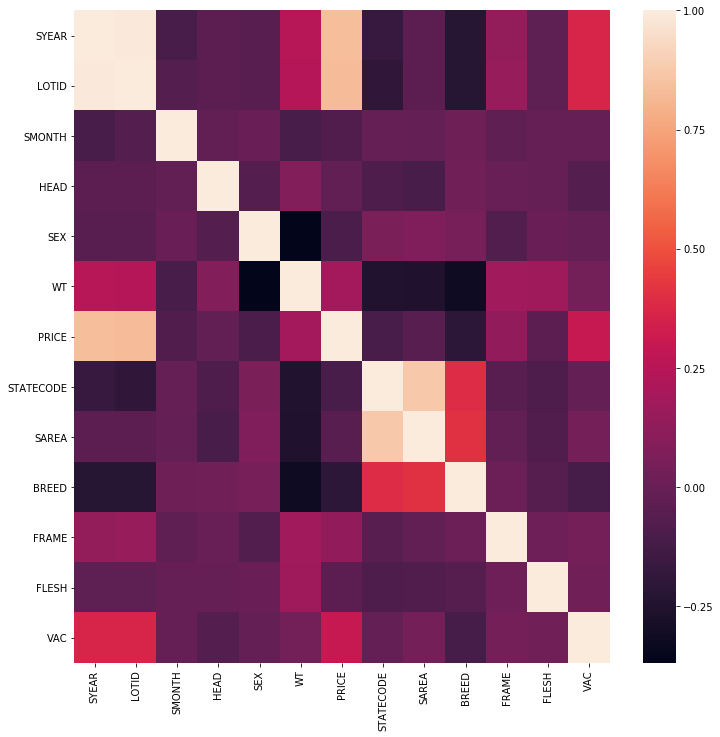

In [875]:
# heat map of correlation
plt.figure(figsize=(12,12))
sns.heatmap(FEEDER.corr())

Because of the large number of categorical variables in this dataset, correctly interpreting a correlation has limitations. 

In [874]:
#Exporting Data to CSV to use in Tableau for Data Visulaization 
#Tableau charts shared in a PowerPoint File 
FEEDER.to_csv("data/FEEDER1.csv")